In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np

from pianoq.lab.dmd import DMD
from pianoq.lab.VimbaCamera import VimbaCamera
from pianoq.lab.lee_holo.generate_lee import make_oam_donut
from pianoq.misc.misc import colorize
from pianoq.misc.mplt import mimshow

from pianoq.lab.lee_holo.lab_helpers import LabMeasure, LabResults

# Initialize hardware
cam = VimbaCamera(0)
dmd = DMD()

INFO:vmbpyLog:Starting vmbpy: 1.0.4 (using VmbC: 1.0.5, VmbImageTransform: 2.0)


Connected!
Built project!


In [2]:
# Experiment Parameters
GRATING_PERIOD_PX = 8
CARRIER_F = (1 / GRATING_PERIOD_PX, 0)
DUTY_CYCLE = 0.5
FOURIER_CROP_SLICE = np.s_[420:500, 720:800]

In [3]:
# Run Experiment
cam.set_exposure_time(50)
lab_measure = LabMeasure(
    dmd=dmd,
    cam=cam,
    carrier_f=CARRIER_F,
    duty_cycle=DUTY_CYCLE,
    fourier_crop_slice=FOURIER_CROP_SLICE,
)

targets = []
for ell in [1, 2]:
    target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=ell, r0=0.15, sigma=0.05)
    targets.append(target)

# This will measure background automatically on the first run
results = lab_measure.run_experiment(targets)

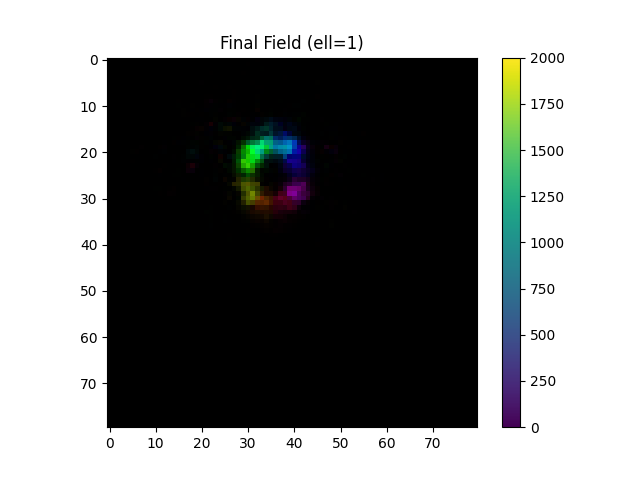

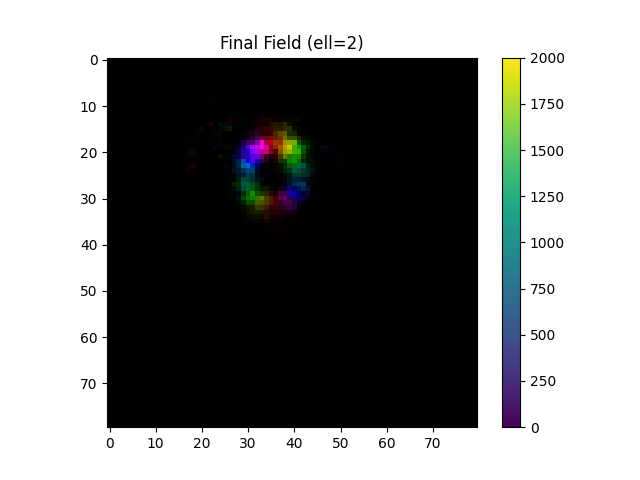

In [4]:
# Visualize Results
for i, result in enumerate(results):
    ell = i + 1
    corrected_field = result.get_corrected_field()
    mimshow(colorize(corrected_field), vmax=2000, title=f'Final Field (ell={ell})', figshow=False)

In [5]:
# Cleanup
# dmd.close()
# cam.close()

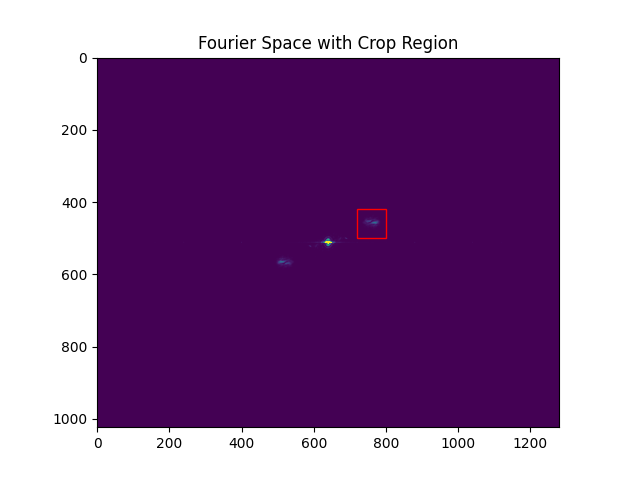

In [6]:
# Save and Load Example
# Save the first result
results[0].save("ell_1_result.npz")

# Load the result back
loaded_result = LabResults.load("ell_1_result.npz")
loaded_result.plot_fourier_space()

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Loaded Final Field (ell=1)'}>)

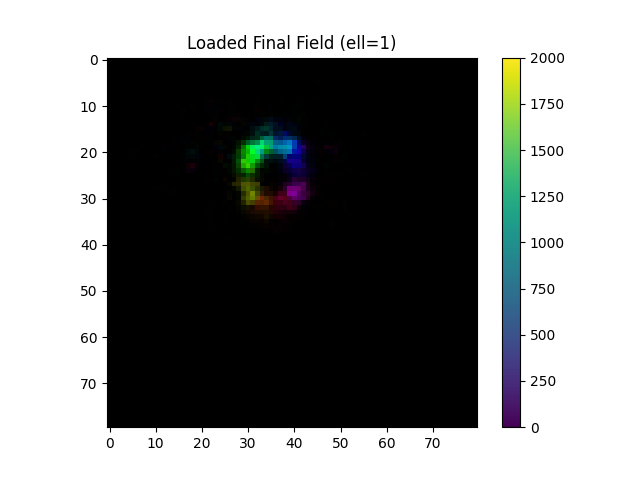

In [7]:
loaded_corrected_field = loaded_result.get_corrected_field()
mimshow(colorize(loaded_corrected_field), vmax=2000, title='Loaded Final Field (ell=1)', figshow=False)